Описание данных
wellName Название скважины

datasetName Название набора данных

MD Измеренная глубина

BK Боковой каротаж (сопротивление)

Facies Фация (свойство)

GR Гамма-каротаж

LIT Литология

NKTB Нейтронный каротаж

SP Метод потенциалов собственной поляризации

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и плотных породах на большом интервале

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и коллекторах на большом интервале

Нужно определять фации в коллеторах (LIT = 4)

1 – глина

2 – алевролит

5- плотная порода

6 - уголь

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и плотных породах на большом интервале

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и коллекторах на большом интервале, но не выше 2000 м (MD>2000)

Самые основные конечно – GR и SP, их форму геологи учитывают для определения условий осадконакопления, можно будет попробовать оценить форму кривых, а не значения параметра) Единственный нюанс – пока в таблице всего 19 скважин, но фации в них выделены наиболее уверенно. Ну и судя по всему, информация с MD < 2000 не принципиальна

SP (каротаж естественной поляризации)
GR (гамма каротаж)
DT (акустический каротаж)
Density (плотностной каротаж)

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import lasio
from os import listdir
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from IPython.display import display, clear_output
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [2]:
name_dataset = 'DATATRAIN18+LAYER.csv'

In [3]:
def get_for_learn_clean_df(statistic_df):
    feature = statistic_df.copy()
    del feature['datasetName']
    #feature = feature[feature["Facies"] >= -999]
    feature = feature[feature["BK"] >= -999]
    feature = feature[feature["SP"] >= -999]
    return feature


for_ml = get_for_learn_clean_df(pd.read_csv(name_dataset, sep=';'))
display(for_ml.describe())
display(for_ml[for_ml["Facies"] == 7].describe())
display(for_ml)
display(for_ml[for_ml["Facies"] > -999].describe())

MD           BK        Facies            GR           LIT  \
count  69846.000000  69846.00000  69846.000000  69846.000000  69846.000000   
mean    2146.093572     16.88084  -9575.889128   -942.107587  -7686.804384   
std      402.355621    194.48259   2013.442132   2937.741651   4216.454069   
min      721.000000     -6.90000  -9999.000000  -9999.000000  -9999.000000   
25%     1892.000000      5.19000  -9999.000000      6.960000  -9999.000000   
50%     2189.600000      7.02000  -9999.000000      9.194000  -9999.000000   
75%     2455.800000      9.50000  -9999.000000     11.660000  -9999.000000   
max     3093.000000  22739.52000     12.000000    142.370000      6.000000   

               NKTB            SP  
count  69846.000000  69846.000000  
mean    -943.411154    107.161288  
std     2928.513258     39.107406  
min    -9999.000000     -1.588982  
25%        2.770405     82.653728  
50%        3.483779    105.993450  
75%        4.080404    123.194050  
max       14.500000    578.255500

MD         BK  Facies          GR         LIT        NKTB  \
count   635.000000  635.00000   635.0  635.000000  635.000000  635.000000   
mean   2676.363780   12.43022     7.0    8.431178    3.212598    4.796372   
std     179.237937   11.04495     0.0    2.228323    1.396424    0.652793   
min    2532.400000    3.92900     7.0    4.515000    1.000000    3.392938   
25%    2549.100000    6.50450     7.0    6.559500    2.000000    4.359206   
50%    2605.800000   10.32100     7.0    8.310000    4.000000    4.694145   
75%    2691.300000   15.71050     7.0    9.915000    4.000000    5.205000   
max    3050.400000  124.25700     7.0   15.775000    5.000000    7.856283   

               SP  
count  635.000000  
mean   114.317309  
std     36.825378  
min     52.900000  
25%     90.887195  
50%    100.782700  
75%    147.673100  
max    205.800300

wellName      MD       BK  Facies      GR  LAYER   LIT      NKTB  \
0       spk1521  2011.0    4.420   -9999  13.600  -9999 -9999  2.968678   
1       spk1521  2011.2    4.300   -9999  13.510  -9999 -9999  2.937724   
2       spk1521  2011.4    4.310   -9999  13.170  -9999 -9999  2.973814   
3       spk1521  2011.6    4.280   -9999  13.030  -9999 -9999  2.989185   
4       spk1521  2011.8    4.260   -9999  12.940  -9999 -9999  2.968678   
5       spk1521  2012.0    4.410   -9999  12.640  -9999 -9999  3.024832   
6       spk1521  2012.2    4.500   -9999  12.610  -9999 -9999  3.055148   
7       spk1521  2012.4    5.000   -9999  12.930  -9999 -9999  3.105200   
8       spk1521  2012.6    4.750   -9999  13.440  -9999 -9999  3.139893   
9       spk1521  2012.8    4.590   -9999  13.410  -9999 -9999  3.115140   
10      spk1521  2013.0    4.630   -9999  13.230  -9999 -9999  3.134954   
11      spk1521  2013.2    4.980   -9999  12.770  -9999 -9999  3.134954   
12      spk1521  2013.4    5.020   -9999  12.370  -9999 -9999  3.100220   
13      spk1521  2013.6    4.300   -9999  12.090  -9999 -9999  3.024832   
14      spk1521  2013.8    3.890   -9999  12.330  -9999 -9999  3.045067   
15      spk1521  2014.0    3.740   -9999  12.810  -9999 -9999  3.125058   
16      spk1521  2014.2    3.930   -9999  13.390  -9999 -9999  3.203604   
17      spk1521  2014.4    4.180   -9999  13.720  -9999 -9999  3.188983   
18      spk1521  2014.6    4.460   -9999  14.300  -9999 -9999  3.065205   
19      spk1521  2014.8    4.500   -9999  14.750  -9999 -9999  3.080247   
20      spk1521  2015.0    4.420   -9999  14.560  -9999 -9999  3.154678   
21      spk1521  2015.2    4.270   -9999  14.230  -9999 -9999  3.164507   
22      spk1521  2015.4    4.000   -9999  14.300  -9999 -9999  3.110173   
23      spk1521  2015.6    4.120   -9999  14.250  -9999 -9999  3.100220   
24      spk1521  2015.8    4.280   -9999  14.000  -9999 -9999  3.154678   
25      spk1521  2016.0    4.180   -9999  14.090  -9999 -9999  3.184098   
26      spk1521  2016.2    4.210   -9999  14.130  -9999 -9999  3.188983   
27      spk1521  2016.4    4.250   -9999  13.940  -9999 -9999  3.115140   
28      spk1521  2016.6    4.240   -9999  13.680  -9999 -9999  3.060180   
29      spk1521  2016.8    4.140   -9999  13.180  -9999 -9999  3.019758   
...         ...     ...      ...     ...     ...    ...   ...       ...   
125038  spk432R  2678.2   11.835   -9999   9.725    UV3     1  4.011883   
125039  spk432R  2678.4   12.405   -9999  12.645    UV3     1  3.459317   
125040  spk432R  2678.6   17.880   -9999  13.365    UV3     1  3.301441   
125041  spk432R  2678.8   18.137   -9999  11.735    UV3     1  3.465297   
125042  spk432R  2679.0   13.233   -9999  10.627    UV3     1  3.839057   
125043  spk432R  2679.2   13.055   -9999  10.746    UV3     1  4.188297   
125044  spk432R  2679.4   12.781   -9999  12.202    UV3     1  3.759521   
125045  spk432R  2679.6   17.643   -9999  13.981    UV3     1  3.381576   
125046  spk432R  2679.8   18.698   -9999  13.490    UV3     1  3.251806   
125047  spk432R  2680.0   15.659   -9999  11.812    UV3     1  3.999325   
125048  spk432R  2680.2   14.257   -9999  10.172    UV3     6  3.128017   
125049  spk432R  2680.4   16.439   -9999   8.770    UV3     6  2.544355   
125050  spk432R  2680.6   64.538   -9999   9.315    UV3     6  2.314718   
125051  spk432R  2680.8   21.523   -9999  12.135    UV3     6  2.745886   
125052  spk432R  2681.0   11.473   -9999  13.845    UV3     1  4.140456   
125053  spk432R  2681.2    9.725   -9999  13.083    UV3     1  4.608701   
125054  spk432R  2681.4    7.780   -9999  12.281    UV3     1  4.175141   
125055  spk432R  2681.6    9.353   -9999  10.920    UV3     2  4.329429   
125056  spk432R  2681.8    9.295   -9999  10.729    UV3     2  4.737274   
125057  spk432R  2682.0    9.345   -9999  10.200    UV3     2  4.988441   
125058  spk432R  2682.2    9.935   -9999   8.960    UV3     4  4.749235   
125059  spk432R  2682.4   10.619

MD           BK      Facies           GR          LIT  \
count  2954.000000  2954.000000  2954.00000  2954.000000  2954.000000   
mean   2606.556364    10.946255     5.26608  -617.385604  -126.428910   
std     127.306556    11.162536     2.38241  2425.357626  1127.203192   
min    2507.600000     3.414000     0.00000 -9999.000000 -9999.000000   
25%    2547.600000     6.800000     5.00000     6.810000     1.000000   
50%    2568.200000     8.600000     5.00000     8.766500     1.000000   
75%    2595.600000    11.700000     7.00000    10.902250     4.000000   
max    3086.200000   231.100000    12.00000    18.340000     5.000000   

              NKTB           SP  
count  2954.000000  2954.000000  
mean   -622.073894   112.325442  
std    2424.144060    32.675092  
min   -9999.000000    49.395160  
25%       3.760663    93.534067  
50%       4.237521   108.352350  
75%       4.764340   124.523150  
max       8.589926   207.469100

In [4]:
def get_well_with_last_features(well):
    def add_deviation_m(well_copy, name, shift_periods_depth, window_rolling, window_rolling_local):
        last = well_copy[name].shift(periods=-shift_periods_depth).rolling(window=window_rolling, center=True).max()
        curr = well_copy[name].rolling(window=window_rolling_local, center=True).max()
        well_copy[name + '_deviation_' + str(shift_periods_depth)] = (curr - last) / last

    shift_periods_depth = 88
    window_rolling = 116
    window_rolling_local = 60

    well_copy = well.copy()
    add_deviation_m(well_copy, name='SP', shift_periods_depth=shift_periods_depth, window_rolling=window_rolling,
                    window_rolling_local=window_rolling_local)
    add_deviation_m(well_copy, name='SP', shift_periods_depth=-shift_periods_depth, window_rolling=window_rolling,
                    window_rolling_local=window_rolling_local)

    return well_copy


def get_preprocessing_well_df(all_well_df):
    wall_names = all_well_df['wellName'].unique()
    print(wall_names)
    wells = []
    for name in wall_names:
        well = all_well_df[all_well_df['wellName'] == name].copy()
        well_with_new_features = get_well_with_last_features(well)
        print(well_with_new_features)
        wells.append(well_with_new_features)
    return pd.concat(wells)


for_ml_preprocessing = get_preprocessing_well_df(for_ml)
del for_ml_preprocessing['SP']
del for_ml_preprocessing['GR']
del for_ml_preprocessing['NKTB']
del for_ml_preprocessing['BK']

['spk1521' 'spk1527' 'spk1769' 'spk400' 'spk402' 'spk403' 'spk405R'
 'spk406R' 'spk409R' 'spk420R' 'spk424R' 'spk426R' 'spk428R' 'spk429L'
 'spk432R']
     wellName      MD    BK  Facies     GR  LAYER   LIT      NKTB      SP  \
0     spk1521  2011.0  4.42   -9999  13.60  -9999 -9999  2.968678   97.41   
1     spk1521  2011.2  4.30   -9999  13.51  -9999 -9999  2.937724   97.02   
2     spk1521  2011.4  4.31   -9999  13.17  -9999 -9999  2.973814   97.57   
3     spk1521  2011.6  4.28   -9999  13.03  -9999 -9999  2.989185   97.86   
4     spk1521  2011.8  4.26   -9999  12.94  -9999 -9999  2.968678   98.15   
5     spk1521  2012.0  4.41   -9999  12.64  -9999 -9999  3.024832   97.77   
6     spk1521  2012.2  4.50   -9999  12.61  -9999 -9999  3.055148   97.45   
7     spk1521  2012.4  5.00   -9999  12.93  -9999 -9999  3.105200   98.63   
8     spk1521  2012.6  4.75   -9999  13.44  -9999 -9999  3.139893   99.34   
9     spk1521  2012.8  4.59   -9999  13.41  -9999 -9999  3.115140  100.31   
10

      wellName      MD    BK  Facies     GR  LAYER   LIT      NKTB         SP  \
32687   spk400  1644.2  7.66   -9999  7.600  -9999 -9999  3.113234   86.62780   
32688   spk400  1644.3  7.69   -9999  7.430  -9999 -9999  3.106535   87.09280   
32689   spk400  1644.4  7.73   -9999  7.260  -9999 -9999  3.099837   87.55780   
32690   spk400  1644.5  7.73   -9999  7.260  -9999 -9999  3.073041   88.07780   
32691   spk400  1644.6  7.73   -9999  7.260  -9999 -9999  3.046246   88.59780   
32692   spk400  1644.7  7.78   -9999  7.225  -9999 -9999  3.106535   88.94780   
32693   spk400  1644.8  7.82   -9999  7.190  -9999 -9999  3.166824   89.29780   
32694   spk400  1644.9  7.78   -9999  7.165  -9999 -9999  3.180222   88.98780   
32695   spk400  1645.0  7.73   -9999  7.140  -9999 -9999  3.193619   88.67780   
32696   spk400  1645.1  7.78   -9999  6.970  -9999 -9999  3.220414   88.24280   
32697   spk400  1645.2  7.82   -9999  6.800  -9999 -9999  3.247210   87.80780   
32698   spk400  1645.3  7.82

      wellName      MD    BK  Facies    GR  LAYER   LIT    NKTB         SP  \
51885  spk405R  1643.4   4.1   -9999  11.5  -9999 -9999  2.6275   89.36863   
51886  spk405R  1643.6   6.1   -9999  11.9  -9999 -9999  2.5750   87.76863   
51887  spk405R  1643.8   7.2   -9999  11.9  -9999 -9999  2.4475   93.76863   
51888  spk405R  1644.0   7.0   -9999  12.2  -9999 -9999  2.5600  100.96860   
51889  spk405R  1644.2   6.7   -9999  11.5  -9999 -9999  2.5825  107.56860   
51890  spk405R  1644.4   6.5   -9999  11.2  -9999 -9999  2.6050  115.16860   
51891  spk405R  1644.6   6.5   -9999  11.9  -9999 -9999  2.5750  119.86860   
51892  spk405R  1644.8   6.5   -9999  11.9  -9999 -9999  2.6050  122.06860   
51893  spk405R  1645.0   6.5   -9999  12.2  -9999 -9999  2.5975  122.96860   
51894  spk405R  1645.2   6.2   -9999  12.2  -9999 -9999  2.6425  123.96860   
51895  spk405R  1645.4   5.8   -9999  12.2  -9999 -9999  2.5525  124.26860   
51896  spk405R  1645.6   5.8   -9999  11.9  -9999 -9999  2.5600 

      wellName      MD         BK  Facies      GR  LAYER   LIT      NKTB  \
84081  spk424R  2470.0  11.643000   -9999  10.138  -9999 -9999  4.765429   
84082  spk424R  2470.2   9.149000   -9999  10.186  -9999 -9999  4.433780   
84083  spk424R  2470.4  10.275000   -9999  10.904  -9999 -9999  4.426570   
84084  spk424R  2470.6  10.494000   -9999   9.652  -9999 -9999  4.184766   
84085  spk424R  2470.8   8.392000   -9999  10.684  -9999 -9999  4.268510   
84086  spk424R  2471.0  10.526000   -9999  10.282  -9999 -9999  4.279047   
84087  spk424R  2471.2  11.132000   -9999   8.626  -9999 -9999  4.579084   
84088  spk424R  2471.4  11.061000   -9999   9.363  -9999 -9999  4.472601   
84089  spk424R  2471.6  13.083000   -9999  10.709  -9999 -9999  4.094367   
84090  spk424R  2471.8  13.517000   -9999   9.833  -9999 -9999  4.433780   
84091  spk424R  2472.0  14.713000   -9999   9.740  -9999 -9999  4.279047   
84092  spk424R  2472.2  15.730000   -9999   8.890  -9999 -9999  4.284039   
84093  spk42

       wellName      MD       BK  Facies        GR  LAYER   LIT         NKTB  \
115252  spk432R   721.0   18.350   -9999 -9999.000  -9999 -9999 -9999.000000   
115253  spk432R   721.2   18.260   -9999 -9999.000  -9999 -9999 -9999.000000   
115254  spk432R   721.4   18.090   -9999 -9999.000  -9999 -9999 -9999.000000   
115255  spk432R   721.6   18.120   -9999 -9999.000  -9999 -9999 -9999.000000   
115256  spk432R   721.8   18.150   -9999 -9999.000  -9999 -9999 -9999.000000   
115257  spk432R   722.0   18.050   -9999 -9999.000  -9999 -9999 -9999.000000   
115258  spk432R   722.2   18.190   -9999 -9999.000  -9999 -9999 -9999.000000   
115259  spk432R   722.4   17.980   -9999 -9999.000  -9999 -9999 -9999.000000   
115260  spk432R   722.6   17.750   -9999 -9999.000  -9999 -9999 -9999.000000   
115261  spk432R   722.8   17.680   -9999 -9999.000  -9999 -9999 -9999.000000   
115262  spk432R   723.0   18.150   -9999 -9999.000  -9999 -9999 -9999.000000   
115263  spk432R   723.2   18.150   -9999

In [5]:
#for_ml_preprocessing.to_csv('for_ml_preprocessing_find_facies_7.csv', index=False)
#for_ml_preprocessing = pd.read_csv('for_ml_preprocessing_DATATRAIN18+LAYER.csv')

In [6]:
for_ml_preprocessing.describe()

MD        Facies           LIT  SP_deviation_88  \
count  69846.000000  69846.000000  69846.000000     66801.000000   
mean    2146.093572  -9575.889128  -7686.804384        -0.024636   
std      402.355621   2013.442132   4216.454069         0.104331   
min      721.000000  -9999.000000  -9999.000000        -0.816524   
25%     1892.000000  -9999.000000  -9999.000000        -0.033059   
50%     2189.600000  -9999.000000  -9999.000000        -0.009420   
75%     2455.800000  -9999.000000  -9999.000000         0.004553   
max     3093.000000     12.000000      6.000000         1.208234   

       SP_deviation_-88  
count      66801.000000  
mean          -0.022542  
std            0.103549  
min           -0.804954  
25%           -0.031746  
50%           -0.005487  
75%            0.008008  
max            1.248954

In [7]:
for_ml_preprocessing[for_ml_preprocessing["Facies"] > -999].describe()

MD      Facies          LIT  SP_deviation_88  SP_deviation_-88
count  2954.000000  2954.00000  2954.000000      2569.000000       2863.000000
mean   2606.556364     5.26608  -126.428910        -0.022589         -0.034629
std     127.306556     2.38241  1127.203192         0.054315          0.078364
min    2507.600000     0.00000 -9999.000000        -0.341158         -0.489609
25%    2547.600000     5.00000     1.000000        -0.043623         -0.051389
50%    2568.200000     5.00000     1.000000        -0.017880         -0.024334
75%    2595.600000     7.00000     4.000000         0.005974          0.001170
max    3086.200000    12.00000     5.000000         0.168905          0.164013

In [8]:
def get_features_filtering(wells):
    well_copy = wells.copy()
    well_copy = well_copy[well_copy['Facies'] > -1]
    #well_copy = well_copy[well_copy['LAYER'] == "UV3"]
    del well_copy['LAYER']
    for name_feature in well_copy.columns:
        if(name_feature != 'wellName' and name_feature != 'Facies'):
            print(name_feature)
            well_copy = well_copy[well_copy[name_feature] > -999]
    return well_copy.dropna()


for_ml_with_features = get_features_filtering(for_ml_preprocessing)
display(for_ml_with_features.describe())

MD
LIT
SP_deviation_88
SP_deviation_-88


MD       Facies          LIT  SP_deviation_88  \
count  2544.000000  2544.000000  2544.000000      2544.000000   
mean   2610.912225     5.276730     2.274371        -0.022812   
std     133.848720     2.502471     1.513407         0.054535   
min    2507.600000     0.000000     1.000000        -0.341158   
25%    2547.200000     5.000000     1.000000        -0.044164   
50%    2566.400000     5.000000     1.000000        -0.017939   
75%    2600.800000     7.000000     4.000000         0.005989   
max    3060.400000    12.000000     5.000000         0.168905   

       SP_deviation_-88  
count       2544.000000  
mean          -0.037023  
std            0.081603  
min           -0.489609  
25%           -0.054879  
50%           -0.025160  
75%            0.001170  
max            0.164013

In [9]:
for_ml_with_features

wellName      MD  Facies  LIT  SP_deviation_88  SP_deviation_-88
5044    spk1521  3019.8       8    5         0.155181         -0.079353
5045    spk1521  3020.0       8    5         0.151279         -0.086029
5046    spk1521  3020.2       8    5         0.146337         -0.089952
5047    spk1521  3020.4       8    5         0.140355         -0.094701
5048    spk1521  3020.6       8    5         0.151494         -0.095526
5049    spk1521  3020.8       8    5         0.168905         -0.095526
5050    spk1521  3021.0       8    1         0.142408         -0.098968
5051    spk1521  3021.2       8    1         0.114532         -0.100551
5052    spk1521  3021.4       8    1         0.093831         -0.103028
5053    spk1521  3021.6       8    1         0.076904         -0.104680
5054    spk1521  3021.8       8    1         0.053662         -0.110805
5055    spk1521  3022.0       8    1         0.047464         -0.116036
5056    spk1521  3022.2       8    1         0.044691         -0.118376
5057    spk1521  3022.4       8    4         0.024850         -0.128630
5058    spk1521  3022.6       8    4         0.019670         -0.133035
5059    spk1521  3022.8       8    4         0.013517         -0.133035
5060    spk1521  3023.0       8    4        -0.000080         -0.141019
5061    spk1521  3023.2       8    4        -0.011850         -0.150654
5062    spk1521  3023.4       8    4        -0.022500         -0.159807
5063    spk1521  3023.6       8    4        -0.025783         -0.162629
5064    spk1521  3023.8       8    4        -0.039795         -0.174673
5065    spk1521  3024.0       8    4        -0.058371         -0.190640
5066    spk1521  3024.2       8    4        -0.067579         -0.198555
5067    spk1521  3024.4       8    4        -0.067579         -0.198555
5068    spk1521  3024.6       8    4        -0.067579         -0.198555
5069    spk1521  3024.8       8    4        -0.067579         -0.198555
5070    spk1521  3025.0       8    4        -0.072784         -0.203028
5071    spk1521  3025.2       5    1        -0.072784         -0.203028
5072    spk1521  3025.4       5    1        -0.072784         -0.203028
5073    spk1521  3025.6       5    1        -0.072784         -0.203028
...         ...     ...     ...  ...              ...               ...
124790  spk432R  2628.6       7    2        -0.026374         -0.043845
124791  spk432R  2628.8       7    2        -0.025235         -0.042726
124792  spk432R  2629.0       7    1        -0.016585         -0.034231
124793  spk432R  2629.2       7    1        -0.016585         -0.034231
124794  spk432R  2629.4       7    1        -0.014870         -0.032547
124795  spk432R  2629.6       7    4        -0.014870         -0.032547
124796  spk432R  2629.8       7    4        -0.014870         -0.032547
124797  spk432R  2630.0       7    4        -0.014870         -0.032547
124798  spk432R  2630.2       7    4        -0.014870         -0.032547
124799  spk432R  2630.4       7    4        -0.014870         -0.032547
124800  spk432R  2630.6       7    5        -0.014870         -0.032547
124801  spk432R  2630.8       7    5        -0.014870         -0.032547
124802  spk432R  2631.0       7    5        -0.014870         -0.032547
124803  spk432R  2631.2       7    4        -0.014870         -0.032547
124804  spk432R  2631.4       7    4        -0.016304         -0.032547
124805  spk432R  2631.6       7    4        -0.016304         -0.032547
124806  spk432R  2631.8       7    4        -0.016304         -0.032547
124807  spk432R  2632.0       7    4        -0.016304         -0.032547
124808  spk432R  2632.2       7    4        -0.016304         -0.032547
124809  spk432R  2632.4       7    1        -0.016304         -0.032547
124810  spk432R  2632.6       7    1        -0.018667         -0.032547
124811  spk432R  2632.8       7    1        -0.018667         -0.032547
124812  spk432R  2633.0       7    1        -0.018667         -0.032547
124813  spk432R  2633.2       7    1        -0.

In [10]:
def get_for_learn_featres(for_all_feature_df):
    feature = for_all_feature_df.copy()
    del feature['Facies']
    del feature['wellName']
    del feature['LIT']
    del feature['MD']
    return feature


def get_for_learn_target_class(for_all_feature_df):
    def binary_class(x):
        if x == 7:
            return x
        else:
            return 0
    
    target_class = for_all_feature_df.copy()
    target_class = target_class['Facies']#.apply(lambda x: float(x))
    return target_class.apply(binary_class)

def get_for_learn_target_class_(for_all_feature_df):
    target_class = for_all_feature_df['Facies']
    return target_class

def get_log_features(for_all_feature_df):
    import math
    well_copy = for_all_feature_df.copy()
    for name_feature in well_copy.columns:
        if(name_feature != 'wellName' and name_feature != 'Facies'):
            print(name_feature)
            well_copy[name_feature] = well_copy[name_feature].apply(lambda x: math.log10(x))
    return well_copy

#features_no_preprocessing = get_for_learn_featres(for_ml_with_features)#[for_ml_with_features['Facies'] != 5]
#features = get_log_features(features_no_preprocessing)
features = get_for_learn_featres(for_ml_with_features)#[for_ml_with_features['Facies'] != 5]
target_facies = get_for_learn_target_class(for_ml_with_features)#[for_ml_with_features['Facies'] != 5]
display(target_facies)
#features = get_for_learn_featres(for_ml_with_features[for_ml_with_features['Facies'] != 5])
#target_facies = get_for_learn_target_class(for_ml_with_features[for_ml_with_features['Facies'] != 5])
display(features)


5044      0
5045      0
5046      0
5047      0
5048      0
5049      0
5050      0
5051      0
5052      0
5053      0
5054      0
5055      0
5056      0
5057      0
5058      0
5059      0
5060      0
5061      0
5062      0
5063      0
5064      0
5065      0
5066      0
5067      0
5068      0
5069      0
5070      0
5071      0
5072      0
5073      0
         ..
124790    7
124791    7
124792    7
124793    7
124794    7
124795    7
124796    7
124797    7
124798    7
124799    7
124800    7
124801    7
124802    7
124803    7
124804    7
124805    7
124806    7
124807    7
124808    7
124809    7
124810    7
124811    7
124812    7
124813    7
124814    7
124815    7
124816    7
124817    7
124818    7
124819    7
Name: Facies, Length: 2544, dtype: int64

SP_deviation_88  SP_deviation_-88
5044           0.155181         -0.079353
5045           0.151279         -0.086029
5046           0.146337         -0.089952
5047           0.140355         -0.094701
5048           0.151494         -0.095526
5049           0.168905         -0.095526
5050           0.142408         -0.098968
5051           0.114532         -0.100551
5052           0.093831         -0.103028
5053           0.076904         -0.104680
5054           0.053662         -0.110805
5055           0.047464         -0.116036
5056           0.044691         -0.118376
5057           0.024850         -0.128630
5058           0.019670         -0.133035
5059           0.013517         -0.133035
5060          -0.000080         -0.141019
5061          -0.011850         -0.150654
5062          -0.022500         -0.159807
5063          -0.025783         -0.162629
5064          -0.039795         -0.174673
5065          -0.058371         -0.190640
5066          -0.067579         -0.198555
5067          -0.067579         -0.198555
5068          -0.067579         -0.198555
5069          -0.067579         -0.198555
5070          -0.072784         -0.203028
5071          -0.072784         -0.203028
5072          -0.072784         -0.203028
5073          -0.072784         -0.203028
...                 ...               ...
124790        -0.026374         -0.043845
124791        -0.025235         -0.042726
124792        -0.016585         -0.034231
124793        -0.016585         -0.034231
124794        -0.014870         -0.032547
124795        -0.014870         -0.032547
124796        -0.014870         -0.032547
124797        -0.014870         -0.032547
124798        -0.014870         -0.032547
124799        -0.014870         -0.032547
124800        -0.014870         -0.032547
124801        -0.014870         -0.032547
124802        -0.014870         -0.032547
124803        -0.014870         -0.032547
124804        -0.016304         -0.032547
124805        -0.016304         -0.032547
124806        -0.016304         -0.032547
124807        -0.016304         -0.032547
124808        -0.016304         -0.032547
124809        -0.016304         -0.032547
124810        -0.018667         -0.032547
124811        -0.018667         -0.032547
124812        -0.018667         -0.032547
124813        -0.018667         -0.032547
124814        -0.018667         -0.032547
124815        -0.018667         -0.032547
124816        -0.018667         -0.032547
124817        -0.018667         -0.032547
124818        -0.018667         -0.032547
124819        -0.018667         -0.032547

[2544 rows x 2 columns]

In [11]:
def p(target, labels):
    print('RMSE ошибка равна',mean_squared_error(target, labels))
    print(classification_report(target, labels))
    
def p_cross_val(model, train, labels):
    from sklearn.model_selection import StratifiedKFold
    
    print('cross_val_predict')
    skf = StratifiedKFold(n_splits=9)
    predicted = cross_val_predict(model, train, labels, cv=skf)
    print(classification_report(labels, predicted))
    
    #scores = cross_val_score(model, train, labels, cv=skf)
    #print("---cross_val_score---")
    #print("CV scores: {0}".format(scores))
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    

In [12]:
def get_Ridge_GridSearchCV(train, labels):
    from sklearn.linear_model import RidgeClassifier
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                        labels, 
                                                        random_state=18, 
                                                        test_size=0.3, 
                                                        stratify=labels)

    ridge_model = RidgeClassifier(random_state=18, normalize=True, class_weight={0: 0.7})
    params = {}
    ridge_model_cv = GridSearchCV(ridge_model, params, cv = 5)
    ridge_model_cv.fit(X_train, y_train)
    
    p(y_test, ridge_model_cv.best_estimator_.predict(X_test).round())
    p_cross_val(ridge_model_cv.best_estimator_, train, labels)
    return ridge_model_cv


prod_Ridge_GridSearchCV_model = get_Ridge_GridSearchCV(features, target_facies)


RMSE ошибка равна 9.684554973821989
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       573
           7       1.00      0.21      0.35       191

   micro avg       0.80      0.80      0.80       764
   macro avg       0.90      0.60      0.61       764
weighted avg       0.84      0.80      0.75       764

cross_val_predict
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1909
           7       0.99      0.24      0.39       635

   micro avg       0.81      0.81      0.81      2544
   macro avg       0.90      0.62      0.64      2544
weighted avg       0.85      0.81      0.76      2544



In [13]:
def get_OneVsRestClassifier_randomForestRegressor(train, labels):
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
    
    reg = RandomForestClassifier(random_state = 18, bootstrap=True, class_weight={0: 0.7, 1: 0.3}, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, verbose=0, warm_start=False)

    OVR = OneVsRestClassifier(reg,n_jobs=-1)
    OVR.fit(train, labels)
    
    p(labels, OVR.predict(train).round())
    p_cross_val(OVR, train, labels)
    return OVR

prod_OneVsRest_RandomForest_model = get_OneVsRestClassifier_randomForestRegressor(features, target_facies) 

RMSE ошибка равна 5.06564465408805
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1909
           7       1.00      0.59      0.74       635

   micro avg       0.90      0.90      0.90      2544
   macro avg       0.94      0.79      0.84      2544
weighted avg       0.91      0.90      0.89      2544

cross_val_predict
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1909
           7       0.47      0.25      0.33       635

   micro avg       0.74      0.74      0.74      2544
   macro avg       0.63      0.58      0.58      2544
weighted avg       0.71      0.74      0.71      2544



In [14]:
def logistic_regression(train, labels):
    print('logistic_regression')
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                        labels, random_state=18, test_size=0.3, stratify=labels)
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(random_state=18, 
                               solver="sag",
                               multi_class='multinomial',
                               max_iter=100)
    rfe = RFE(model, 10)
    rfe = rfe.fit(X_train, y_train)
    p(y_test, rfe.predict(X_test))
    p_cross_val(rfe, train, labels)
    return rfe


logistic_regression(features, target_facies)

logistic_regression
RMSE ошибка равна 9.684554973821989
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       573
           7       0.90      0.24      0.37       191

   micro avg       0.80      0.80      0.80       764
   macro avg       0.85      0.61      0.63       764
weighted avg       0.82      0.80      0.76       764

cross_val_predict
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1909
           7       0.77      0.25      0.38       635

   micro avg       0.79      0.79      0.79      2544
   macro avg       0.78      0.61      0.63      2544
weighted avg       0.79      0.79      0.75      2544



RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=18, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [15]:
def get_KNeighborsClassifier(x ,target):
    X_train, X_test, y_train, y_test = train_test_split(x, target, train_size=0.7, stratify=target)
    for k in range(1,15):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        print(" n_neighbors ")
        print(k)
        print(classification_report(y_test, classifier.predict(X_test)))
        predicted = cross_val_predict(classifier, x, target, cv=5)
        print(" cross_val_predict " + str(k) + ' neighbors ')
        print(classification_report(target, predicted))

get_KNeighborsClassifier(features, target_facies)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


 n_neighbors 
1
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       573
           7       0.90      0.88      0.89       191

   micro avg       0.95      0.95      0.95       764
   macro avg       0.93      0.92      0.93       764
weighted avg       0.94      0.95      0.94       764

 cross_val_predict 1 neighbors 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1909
           7       0.46      0.57      0.51       635

   micro avg       0.72      0.72      0.72      2544
   macro avg       0.65      0.67      0.66      2544
weighted avg       0.75      0.72      0.73      2544

 n_neighbors 
2
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       573
           7       0.93      0.84      0.88       191

   micro avg       0.94      0.94      0.94       764
   macro avg       0.94      0.91      0.92       764
weighted a

 cross_val_predict 13 neighbors 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1909
           7       0.37      0.42      0.40       635

   micro avg       0.68      0.68      0.68      2544
   macro avg       0.59      0.59      0.59      2544
weighted avg       0.69      0.68      0.69      2544

 n_neighbors 
14
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       573
           7       0.91      0.76      0.83       191

   micro avg       0.92      0.92      0.92       764
   macro avg       0.92      0.87      0.89       764
weighted avg       0.92      0.92      0.92       764

 cross_val_predict 14 neighbors 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1909
           7       0.39      0.41      0.40       635

   micro avg       0.69      0.69      0.69      2544
   macro avg       0.60      0.60      0.60  

In [16]:
def save_simple_model(model, name):
    import pickle
    from sklearn.externals import joblib
    with open(name, 'wb') as f:
         pickle.dump(model, f)
            
def load_simple_model(name):
    from sklearn.externals import joblib
    test_load_model = joblib.load(name)
    return test_load_model

def save_catboost_model(model, name):
    model.save_model(name)
    
def load_catboost_model(name):
    from catboost import CatBoostClassifier
    from_file = CatBoostClassifier()
    from_file.load_model(name)
    return from_file

In [ ]:
predict facies prod #prod_Ridge_GridSearchCV_model

In [ ]:
#save_simple_model(prod_OneVsRest_RandomForest_model, 'prod_OneVsRest_RandomForest_model_facies_7')

In [38]:
def save_prod(model):

    def get_for_learn_clean_df(statistic_df):
        feature = statistic_df.copy()
        del feature['datasetName']
        feature = feature[feature["BK"] >= -999]
        feature = feature[feature["SP"] >= -999]
        return feature

    def add_deviation_m(well_copy, name, shift_periods_depth, window_rolling, window_rolling_local):
        last = well_copy[name].shift(periods=-shift_periods_depth).rolling(window=window_rolling, center=True).max()
        curr = well_copy[name].rolling(window=window_rolling_local, center=True).max()
        well_copy[name + '_deviation_' + str(shift_periods_depth)] = (curr - last) / last

        shift_periods_depth = 88
        window_rolling = 116
        window_rolling_local = 60

        well_copy = well.copy()
        add_deviation_m(well_copy, name='SP', shift_periods_depth=shift_periods_depth, window_rolling=window_rolling,
                        window_rolling_local=window_rolling_local)
        add_deviation_m(well_copy, name='SP', shift_periods_depth=-shift_periods_depth, window_rolling=window_rolling,
                        window_rolling_local=window_rolling_local)

        return well_copy

    def get_preprocessing_well_df(all_well_df):
        wall_names = all_well_df['wellName'].unique()
        print(wall_names)
        wells = []
        for name in wall_names:
            well = all_well_df[all_well_df['wellName'] == name].copy()
            well_with_new_features = get_well_with_last_features(well)
            print(well_with_new_features)
            wells.append(well_with_new_features)
        return pd.concat(wells)



    def get_md_for_predict(wells):
        well_copy = wells.copy()
        for name_feature in well_copy.columns:
            if (name_feature != 'wellName'  and
                    name_feature != 'LAYER' and
                    name_feature != 'LIT'):
                print(name_feature)
                well_copy = well_copy[well_copy[name_feature] > -999]
                well_copy = well_copy[well_copy[name_feature] < 99999]
        return well_copy.dropna()


    def get_features_for_predict(for_all_feature_df):
        feature = for_all_feature_df.copy()
        del feature['wellName']
        del feature['LIT']
        del feature['MD']
        del feature['LAYER']
        return feature.dropna()

    for_ml_prod = get_for_learn_clean_df(pd.read_csv('TRAIN18PRED.csv', sep=';'))
    display(for_ml_prod.describe())

    for_ml_preprocessing_prod = get_preprocessing_well_df(for_ml_prod)
    del for_ml_preprocessing_prod['SP']
    del for_ml_preprocessing_prod['GR']
    del for_ml_preprocessing_prod['NKTB']
    del for_ml_preprocessing_prod['BK']


    for_predict_df_prod = get_md_for_predict(for_ml_preprocessing_prod)
    for_predict_df = get_features_for_predict(for_predict_df_prod)
    display(for_predict_df.describe())
    for_predict_df_prod['predict_Ridge_facies_7'] = model.predict(for_predict_df)
    display(for_predict_df_prod.describe())
    display(for_predict_df_prod[for_predict_df_prod['predict_Ridge_facies_7'] == 7])
    
    def save(wells):
        well_copy = wells.copy()
        for name_feature in well_copy.columns:
            if (name_feature != 'wellName' and
                    name_feature != 'LAYER' and
                    name_feature != 'MD' and
                    name_feature != 'BK' and
                    name_feature != 'GR' and
                    name_feature != 'LIT' and
                    name_feature != 'NKTB' and
                    name_feature != 'SP' and
                    name_feature != 'predict_Ridge_facies_7' and
                    name_feature != 'predict_cb'):
                print(name_feature)
                del well_copy[name_feature]
        well_copy.describe()
        
        well_copy.to_csv('predict_facies_TRAIN18PRED_facies_7_Ridge_smile.csv', index=False)


    save(for_predict_df_prod[for_predict_df_prod['predict_Ridge_facies_7'] == 7])

save_prod(prod_Ridge_GridSearchCV_model)

MD            BK             GR            LIT  \
count  469828.000000  4.698280e+05  469828.000000  393543.000000   
mean     2252.548300  5.467048e+01    -620.433207   -6082.336975   
std       319.475608  1.745306e+04    2430.537840    4881.611953   
min      1600.400000  0.000000e+00   -9999.000000   -9999.000000   
25%      1989.600000  4.945000e+00       6.570000   -9999.000000   
50%      2249.600000  6.550000e+00       8.320000   -9999.000000   
75%      2507.200000  8.490000e+00      10.400000       1.000000   
max      3169.600000  9.585299e+06     164.851000       6.000000   

                NKTB             SP  
count  469828.000000  469828.000000  
mean     -787.393870      92.809927  
std      2699.462546      38.196478  
min     -9999.000000    -894.662200  
25%         2.612000      66.995000  
50%         3.478518      93.940000  
75%         4.108000     121.090000  
max        30.500000     273.538800

['spk1059L' 'spk1061' 'spk1062' 'spk1205L' 'spk146R' 'spk1504' 'spk1506L'
 'spk1508' 'spk1515' 'spk1517' 'spk1518L' 'spk1519L' 'spk1523' 'spk1524'
 'spk1525' 'spk1528' 'spk1529' 'spk1530' 'spk1531' 'spk1537' 'spk1660PA'
 'spk1665PL' 'spk1700' 'spk1701' 'spk1702' 'spk1703' 'spk1704' 'spk1705'
 'spk1706L' 'spk1707' 'spk1708' 'spk1709' 'spk1710' 'spk1718' 'spk1725'
 'spk1740' 'spk1741' 'spk1742' 'spk1745L' 'spk1750' 'spk1753' 'spk1755'
 'spk1760' 'spk1764' 'spk1765' 'spk1779' 'spk1791' 'spk1792' 'spk1793'
 'spk1794' 'spk1796' 'spk1805' 'spk214P' 'spk236' 'spk401' 'spk404'
 'spk407R' 'spk408' 'spk421R' 'spk422R' 'spk425' 'spk437' 'spk467'
 'spk490' 'spk564P' 'spk632' 'spk804' 'spk805' 'spk808' 'spk833R'
 'spk870PL' 'spk872PL' 'spk902' 'spk904' 'spk908' 'spk914' 'spk924L'
 'spk941' 'spk963L']
      wellName      MD      BK    GR  LAYER     LIT      NKTB     SP  \
0     spk1059L  1765.0    2.33  6.90  -9999 -9999.0  3.759897  72.09   
1     spk1059L  1765.2    2.28  6.78  -9999 -9999.0  3.73

[5040 rows x 10 columns]
      wellName      MD     BK     GR  LAYER  LIT  NKTB     SP  \
17612  spk1062  1899.4   2.10   8.85  -9999  NaN  2.90  27.28   
17613  spk1062  1899.6   2.12   8.78  -9999  NaN  2.85  27.08   
17614  spk1062  1899.8   2.22   8.78  -9999  NaN  2.83  26.50   
17615  spk1062  1900.0   2.28   8.55  -9999  NaN  2.84  26.04   
17616  spk1062  1900.2   2.35   8.47  -9999  NaN  2.74  25.74   
17617  spk1062  1900.4   2.12   8.50  -9999  NaN  2.71  25.46   
17618  spk1062  1900.6   2.02   8.60  -9999  NaN  2.72  25.10   
17619  spk1062  1900.8   1.96   8.69  -9999  NaN  2.74  24.92   
17620  spk1062  1901.0   1.96   8.85  -9999  NaN  2.72  25.48   
17621  spk1062  1901.2   2.06   9.04  -9999  NaN  2.77  26.03   
17622  spk1062  1901.4   2.24   9.05  -9999  NaN  2.68  26.25   
17623  spk1062  1901.6   2.25   9.15  -9999  NaN  2.62  26.04   
17624  spk1062  1901.8   2.31   9.31  -9999  NaN  2.77  26.09   
17625  spk1062  1902.0   2.32   9.02  -9999  NaN  2.73  26.00   


      wellName      MD         BK          GR  LAYER     LIT         NKTB  \
52971  spk146R  2561.2   5.658330     4.21564  -9999 -9999.0     4.115379   
52972  spk146R  2561.3   6.467740     4.21564  -9999 -9999.0     4.127724   
52973  spk146R  2561.4   7.503590     4.22410  -9999 -9999.0     4.123609   
52974  spk146R  2561.5   7.247950     4.36786  -9999 -9999.0     4.086608   
52975  spk146R  2561.6   7.035770     4.46512  -9999 -9999.0     4.045524   
52976  spk146R  2561.7   9.901450     4.55814  -9999 -9999.0     3.987982   
52977  spk146R  2561.8  10.717800     4.67230  -9999 -9999.0     3.983867   
52978  spk146R  2561.9  10.149700     4.61311  -9999 -9999.0     4.000327   
52979  spk146R  2562.0   8.967850     4.51586  -9999 -9999.0     4.024983   
52980  spk146R  2562.1   7.962970     4.57928  -9999 -9999.0     4.041410   
52981  spk146R  2562.2   6.897789     4.71882  -9999 -9999.0     4.041410   
52982  spk146R  2562.3   7.035770     4.84989  -9999 -9999.0     3.950981   

      wellName      MD     BK        GR  LAYER     LIT      NKTB      SP  \
75352  spk1508  2047.0   4.09 -9999.000  -9999 -9999.0  2.895232  37.174   
75353  spk1508  2047.2   4.19 -9999.000  -9999 -9999.0  2.805521  37.017   
75354  spk1508  2047.4   4.33 -9999.000  -9999 -9999.0  2.974130  36.619   
75355  spk1508  2047.6   4.31 -9999.000  -9999 -9999.0  2.964310  36.424   
75356  spk1508  2047.8   4.34 -9999.000  -9999 -9999.0  2.855487  36.625   
75357  spk1508  2048.0   4.19 -9999.000  -9999 -9999.0  2.865442  36.419   
75358  spk1508  2048.2   4.23 -9999.000  -9999 -9999.0  2.954478  36.068   
75359  spk1508  2048.4   4.05 -9999.000  -9999 -9999.0  2.735017  35.965   
75360  spk1508  2048.6   4.10 -9999.000  -9999 -9999.0  2.775385  36.154   
75361  spk1508  2048.8   4.34 -9999.000  -9999 -9999.0  2.944634  36.715   
75362  spk1508  2049.0   4.48 -9999.000  -9999 -9999.0  2.964310  38.329   
75363  spk1508  2049.2   4.50 -9999.000  -9999 -9999.0  3.091069  39.791   
75364  spk15

[4941 rows x 10 columns]
        wellName      MD     BK       GR  LAYER     LIT     NKTB      SP  \
101608  spk1518L  1669.0   3.92 -9999.00  -9999 -9999.0 -9999.00   75.69   
101609  spk1518L  1669.2   4.54 -9999.00  -9999 -9999.0 -9999.00   76.15   
101610  spk1518L  1669.4   4.97 -9999.00  -9999 -9999.0 -9999.00   76.25   
101611  spk1518L  1669.6   4.06 -9999.00  -9999 -9999.0 -9999.00   74.55   
101612  spk1518L  1669.8   3.17 -9999.00  -9999 -9999.0 -9999.00   74.49   
101613  spk1518L  1670.0   3.74 -9999.00  -9999 -9999.0 -9999.00   74.18   
101614  spk1518L  1670.2   3.43 -9999.00  -9999 -9999.0 -9999.00   73.69   
101615  spk1518L  1670.4   3.23 -9999.00  -9999 -9999.0 -9999.00   74.24   
101616  spk1518L  1670.6   5.30 -9999.00  -9999 -9999.0 -9999.00   74.22   
101617  spk1518L  1670.8  20.36 -9999.00  -9999 -9999.0 -9999.00   75.21   
101618  spk1518L  1671.0  75.31 -9999.00  -9999 -9999.0 -9999.00   76.05   
101619  spk1518L  1671.2  75.66 -9999.00  -9999 -9999.0 -9999.0

       wellName      MD     BK       GR  LAYER     LIT     NKTB     SP  \
116703  spk1524  1637.0   3.33 -9999.00  -9999 -9999.0 -9999.00  31.48   
116704  spk1524  1637.2   3.04 -9999.00  -9999 -9999.0 -9999.00  32.82   
116705  spk1524  1637.4   2.86 -9999.00  -9999 -9999.0 -9999.00  34.40   
116706  spk1524  1637.6   3.04 -9999.00  -9999 -9999.0 -9999.00  36.03   
116707  spk1524  1637.8   3.09 -9999.00  -9999 -9999.0 -9999.00  38.29   
116708  spk1524  1638.0   2.40 -9999.00  -9999 -9999.0 -9999.00  41.18   
116709  spk1524  1638.2   2.28 -9999.00  -9999 -9999.0 -9999.00  42.54   
116710  spk1524  1638.4   2.45 -9999.00  -9999 -9999.0 -9999.00  44.29   
116711  spk1524  1638.6   2.63 -9999.00  -9999 -9999.0 -9999.00  47.43   
116712  spk1524  1638.8   2.57 -9999.00  -9999 -9999.0 -9999.00  49.05   
116713  spk1524  1639.0   2.92 -9999.00  -9999 -9999.0 -9999.00  49.40   
116714  spk1524  1639.2   4.09 -9999.00  -9999 -9999.0 -9999.00  49.11   
116715  spk1524  1639.4   4.32 -9999.0

       wellName      MD      BK       GR  LAYER     LIT     NKTB     SP  \
151479  spk1529  1894.0    3.17     7.16  -9999 -9999.0     2.70  35.38   
151480  spk1529  1894.2    3.03     6.80  -9999 -9999.0     2.97  35.06   
151481  spk1529  1894.4    3.20     6.59  -9999 -9999.0     3.18  37.27   
151482  spk1529  1894.6    3.62     6.89  -9999 -9999.0     2.63  37.39   
151483  spk1529  1894.8    3.66     6.83  -9999 -9999.0     2.53  37.16   
151484  spk1529  1895.0    3.57     6.48  -9999 -9999.0     2.70  37.46   
151485  spk1529  1895.2    3.47     6.02  -9999 -9999.0     2.91  37.12   
151486  spk1529  1895.4    3.82     5.32  -9999 -9999.0     3.31  37.68   
151487  spk1529  1895.6    4.08     4.75  -9999 -9999.0     4.89  38.59   
151488  spk1529  1895.8    4.08     4.40  -9999 -9999.0     6.76  39.23   
151489  spk1529  1896.0    3.92     4.05  -9999 -9999.0     6.45  39.64   
151490  spk1529  1896.2    3.75     4.24  -9999 -9999.0     7.07  39.30   
151491  spk1529  1896.4  

       wellName      MD     BK           GR  LAYER     LIT   NKTB      SP  \
195647  spk1537  1842.0   3.90     6.500000  -9999 -9999.0  2.910   90.98   
195648  spk1537  1842.2   4.52     5.930000  -9999 -9999.0  2.680   91.36   
195649  spk1537  1842.4   4.59     5.390000  -9999 -9999.0  2.690   91.00   
195650  spk1537  1842.6   4.25     5.130000  -9999 -9999.0  2.860   90.93   
195651  spk1537  1842.8   3.86     5.320000  -9999 -9999.0  2.610   91.94   
195652  spk1537  1843.0   3.64     5.760000  -9999 -9999.0  2.330   92.96   
195653  spk1537  1843.2   3.58     6.200000  -9999 -9999.0  2.270   93.94   
195654  spk1537  1843.4   3.67     6.330000  -9999 -9999.0  2.340   95.47   
195655  spk1537  1843.6   4.07     6.220000  -9999 -9999.0  2.280   96.35   
195656  spk1537  1843.8   4.67     6.050000  -9999 -9999.0  2.190   95.96   
195657  spk1537  1844.0   5.06     5.980000  -9999 -9999.0  2.400   95.66   
195658  spk1537  1844.2   4.44     5.990000  -9999 -9999.0  2.740   95.58   

[5112 rows x 10 columns]
       wellName      MD     BK       GR  LAYER     LIT         NKTB  \
278791  spk1701  1685.0   7.72     4.50  -9999 -9999.0     3.477058   
278792  spk1701  1685.2   7.88     4.56  -9999 -9999.0     3.512222   
278793  spk1701  1685.4   8.10     4.80  -9999 -9999.0     3.465298   
278794  spk1701  1685.6   8.24     4.48  -9999 -9999.0     3.441722   
278795  spk1701  1685.8   8.35     4.51  -9999 -9999.0     3.441722   
278796  spk1701  1686.0   8.38     4.84  -9999 -9999.0     3.429904   
278797  spk1701  1686.2   8.36     4.86  -9999 -9999.0     3.394334   
278798  spk1701  1686.4   8.31     4.58  -9999 -9999.0     3.310633   
278799  spk1701  1686.6   8.19     4.25  -9999 -9999.0     3.274450   
278800  spk1701  1686.8   8.02     4.24  -9999 -9999.0     3.547218   
278801  spk1701  1687.0   8.13     4.16  -9999 -9999.0     4.322642   
278802  spk1701  1687.2  16.96     3.80  -9999 -9999.0     4.967025   
278803  spk1701  1687.4  50.79     4.17  -9999 -9999

       wellName      MD      BK       GR  LAYER     LIT         NKTB  \
297269  spk1703  1710.0    7.60     6.46  -9999 -9999.0     4.001027   
297270  spk1703  1710.2    7.50     6.20  -9999 -9999.0     4.142132   
297271  spk1703  1710.4    7.80     6.49  -9999 -9999.0     3.800667   
297272  spk1703  1710.6    7.60     6.88  -9999 -9999.0     3.872615   
297273  spk1703  1710.8    7.40     6.31  -9999 -9999.0     4.085883   
297274  spk1703  1711.0    7.30     6.22  -9999 -9999.0     3.699176   
297275  spk1703  1711.2    7.20     6.70  -9999 -9999.0     3.843889   
297276  spk1703  1711.4    7.10     6.57  -9999 -9999.0     4.156155   
297277  spk1703  1711.6    6.80     6.23  -9999 -9999.0     4.170162   
297278  spk1703  1711.8    6.60     6.14  -9999 -9999.0     3.886952   
297279  spk1703  1712.0    6.60     6.70  -9999 -9999.0     3.886952   
297280  spk1703  1712.2    6.50     6.11  -9999 -9999.0     3.829500   
297281  spk1703  1712.4    6.50     4.73  -9999 -9999.0     4.33

        wellName      MD     BK       GR  LAYER     LIT         NKTB  \
337692  spk1706L  1680.0   8.30     6.18  -9999 -9999.0     3.043145   
337693  spk1706L  1680.1   8.45     6.30  -9999 -9999.0     3.207664   
337694  spk1706L  1680.2   8.60     6.32  -9999 -9999.0     3.363111   
337695  spk1706L  1680.3   8.85     6.26  -9999 -9999.0     3.459918   
337696  spk1706L  1680.4   9.10     6.13  -9999 -9999.0     3.481825   
337697  spk1706L  1680.5   9.18     5.96  -9999 -9999.0     3.408179   
337698  spk1706L  1680.6   9.26     5.80  -9999 -9999.0     3.286432   
337699  spk1706L  1680.7   9.24     5.67  -9999 -9999.0     3.159330   
337700  spk1706L  1680.8   9.22     5.59  -9999 -9999.0     3.068463   
337701  spk1706L  1680.9   9.44     5.56  -9999 -9999.0     3.017586   
337702  spk1706L  1681.0   9.65     5.59  -9999 -9999.0     2.956968   
337703  spk1706L  1681.1   9.97     5.71  -9999 -9999.0     2.858752   
337704  spk1706L  1681.2  10.28     5.90  -9999 -9999.0     2.74

       wellName      MD     BK        GR  LAYER     LIT      NKTB        SP  \
389731  spk1709  1770.0   7.48     6.670  -9999 -9999.0     2.010  129.0747   
389732  spk1709  1770.1   7.44     6.450  -9999 -9999.0     2.000  129.1677   
389733  spk1709  1770.2   7.40     6.230  -9999 -9999.0     1.990  129.2597   
389734  spk1709  1770.3   7.48     6.210  -9999 -9999.0     2.035  129.5707   
389735  spk1709  1770.4   7.56     6.190  -9999 -9999.0     2.080  129.8807   
389736  spk1709  1770.5   7.35     6.220  -9999 -9999.0     1.925  130.0747   
389737  spk1709  1770.6   7.13     6.250  -9999 -9999.0     1.770  130.2687   
389738  spk1709  1770.7   6.78     6.325  -9999 -9999.0     1.785  130.4137   
389739  spk1709  1770.8   6.44     6.400  -9999 -9999.0     1.800  130.5587   
389740  spk1709  1770.9   6.55     6.230  -9999 -9999.0     1.835  130.5697   
389741  spk1709  1771.0   6.66     6.060  -9999 -9999.0     1.870  130.5797   
389742  spk1709  1771.1   6.68     6.230  -9999 -999

       wellName      MD    BK       GR  LAYER  LIT     NKTB     SP  \
404892  spk1718  1710.2   6.4     7.31  -9999  NaN     1.20   75.0   
404893  spk1718  1710.4   7.0     7.12  -9999  NaN     1.20   71.9   
404894  spk1718  1710.6   7.2     7.07  -9999  NaN     1.21   69.2   
404895  spk1718  1710.8   6.9     7.13  -9999  NaN     1.21   68.7   
404896  spk1718  1711.0   6.8     6.99  -9999  NaN     1.20   69.8   
404897  spk1718  1711.2   6.6     6.50  -9999  NaN     1.19   71.6   
404898  spk1718  1711.4   6.5     6.41  -9999  NaN     1.23   73.7   
404899  spk1718  1711.6   6.7     6.72  -9999  NaN     1.26   74.1   
404900  spk1718  1711.8   7.0     7.00  -9999  NaN     1.28   72.6   
404901  spk1718  1712.0   7.0     7.28  -9999  NaN     1.28   70.9   
404902  spk1718  1712.2   7.1     7.44  -9999  NaN     1.28   70.7   
404903  spk1718  1712.4   6.8     7.56  -9999  NaN     1.28   72.6   
404904  spk1718  1712.6   6.7     7.67  -9999  NaN     1.27   74.9   
404905  spk1718  171

[5367 rows x 10 columns]
       wellName      MD     BK       GR  LAYER     LIT     NKTB      SP  \
437377  spk1741  1691.0   6.23     6.74  -9999 -9999.0     2.33   64.36   
437378  spk1741  1691.2   5.85     7.84  -9999 -9999.0     2.49   65.68   
437379  spk1741  1691.4   4.91     7.51  -9999 -9999.0     2.34   69.34   
437380  spk1741  1691.6   4.23     6.58  -9999 -9999.0     1.96   72.90   
437381  spk1741  1691.8   5.05     6.98  -9999 -9999.0     1.54   75.30   
437382  spk1741  1692.0   7.39     7.56  -9999 -9999.0     1.66   78.60   
437383  spk1741  1692.2   4.04     7.71  -9999 -9999.0     1.97   79.85   
437384  spk1741  1692.4   4.49     7.41  -9999 -9999.0     1.97   80.09   
437385  spk1741  1692.6   5.07     7.69  -9999 -9999.0     2.40   79.97   
437386  spk1741  1692.8   4.10     7.46  -9999 -9999.0     2.43   81.70   
437387  spk1741  1693.0   3.56     7.66  -9999 -9999.0     2.39   83.20   
437388  spk1741  1693.2   3.82     7.80  -9999 -9999.0     2.22   80.84   


        wellName      MD      BK     GR  LAYER     LIT   NKTB      SP  \
452430  spk1745L  1884.0  134.20   4.56  -9999 -9999.0  11.15   60.96   
452431  spk1745L  1884.2  145.61   4.60  -9999 -9999.0  11.60   58.92   
452432  spk1745L  1884.4  142.77   4.88  -9999 -9999.0  10.69   57.11   
452433  spk1745L  1884.6   18.45   5.44  -9999 -9999.0   8.61   54.52   
452434  spk1745L  1884.8   10.62   5.76  -9999 -9999.0   6.75   52.54   
452435  spk1745L  1885.0    9.62   6.00  -9999 -9999.0   5.53   50.93   
452436  spk1745L  1885.2    9.44   6.06  -9999 -9999.0   5.23   50.95   
452437  spk1745L  1885.4    9.36   5.86  -9999 -9999.0   5.17   51.01   
452438  spk1745L  1885.6    9.22   5.97  -9999 -9999.0   5.09   51.64   
452439  spk1745L  1885.8    9.28   6.68  -9999 -9999.0   5.05   52.88   
452440  spk1745L  1886.0    9.04   7.09  -9999 -9999.0   5.00   55.42   
452441  spk1745L  1886.2    8.91   7.24  -9999 -9999.0   5.00   59.86   
452442  spk1745L  1886.4    8.64   7.43  -9999 -999

       wellName      MD     BK     GR  LAYER     LIT  NKTB      SP  \
476386  spk1753  1706.0   8.67   8.99  -9999     4.0  3.74   40.46   
476387  spk1753  1706.2   6.71   9.33  -9999     4.0  3.70   47.94   
476388  spk1753  1706.4   6.93   9.34  -9999     4.0  3.62   55.22   
476389  spk1753  1706.6   6.04   9.76  -9999     1.0  3.51   59.56   
476390  spk1753  1706.8   6.90  10.64  -9999     1.0  3.51   64.63   
476391  spk1753  1707.0   5.69  11.60  -9999     1.0  3.46   67.84   
476392  spk1753  1707.2   4.35  12.04  -9999     1.0  3.26   68.98   
476393  spk1753  1707.4   5.23  11.08  -9999     1.0  3.20   64.57   
476394  spk1753  1707.6   7.18   9.78  -9999     1.0  3.30   57.07   
476395  spk1753  1707.8   8.11   9.02  -9999     1.0  3.45   47.98   
476396  spk1753  1708.0   8.99   8.22  -9999     4.0  3.66   39.93   
476397  spk1753  1708.2  10.19   7.99  -9999     4.0  3.72   35.67   
476398  spk1753  1708.4  10.19   7.94  -9999     4.0  3.62   30.20   
476399  spk1753  170

       wellName      MD     BK        GR  LAYER     LIT     NKTB     SP  \
512541  spk1765  2014.0   4.49  7.300000  -9999 -9999.0  2.19000  81.14   
512542  spk1765  2014.2   5.12  6.280000  -9999 -9999.0  2.37000  78.54   
512543  spk1765  2014.4   6.35  5.530000  -9999 -9999.0  2.43000  71.61   
512544  spk1765  2014.6   7.87  5.240000  -9999 -9999.0  2.45000  63.73   
512545  spk1765  2014.8   8.12  5.170000  -9999 -9999.0  2.45000  57.91   
512546  spk1765  2015.0   7.97  5.050000  -9999 -9999.0  2.57000  53.25   
512547  spk1765  2015.2   7.92  5.140000  -9999 -9999.0  2.62000  49.86   
512548  spk1765  2015.4   7.99  5.450000  -9999 -9999.0  2.44000  46.55   
512549  spk1765  2015.6   7.91  5.430000  -9999 -9999.0  2.37000  44.64   
512550  spk1765  2015.8   7.95  5.260000  -9999 -9999.0  2.59000  44.07   
512551  spk1765  2016.0   7.94  5.140000  -9999 -9999.0  2.70000  44.07   
512552  spk1765  2016.2   7.95  5.030000  -9999 -9999.0  2.58000  43.55   
512553  spk1765  2016.4  

       wellName      MD     BK     GR  LAYER     LIT  NKTB     SP  \
542835  spk1791  1633.0   6.35   8.57  -9999 -9999.0  2.84  31.23   
542836  spk1791  1633.2   6.46   7.94  -9999 -9999.0  3.12  27.51   
542837  spk1791  1633.4   6.24   7.61  -9999 -9999.0  3.44  25.14   
542838  spk1791  1633.6   6.60   7.20  -9999 -9999.0  3.37  24.92   
542839  spk1791  1633.8   6.32   6.95  -9999 -9999.0  3.38  23.29   
542840  spk1791  1634.0   5.87   6.99  -9999 -9999.0  3.47  20.50   
542841  spk1791  1634.2   5.75   7.15  -9999 -9999.0  3.34  19.43   
542842  spk1791  1634.4   5.69   7.33  -9999 -9999.0  3.23  19.06   
542843  spk1791  1634.6   5.52   7.24  -9999 -9999.0  3.05  19.29   
542844  spk1791  1634.8   5.39   7.24  -9999 -9999.0  3.13  21.57   
542845  spk1791  1635.0   5.45   7.14  -9999 -9999.0  2.96  19.85   
542846  spk1791  1635.2   5.19   7.05  -9999 -9999.0  2.74  19.43   
542847  spk1791  1635.4   5.53   7.22  -9999 -9999.0  2.87  20.91   
542848  spk1791  1635.6   5.69   7

       wellName      MD     BK       GR  LAYER     LIT     NKTB     SP  \
557686  spk1794  1687.0   5.50     6.63  -9999     4.0     4.39  22.68   
557687  spk1794  1687.2   5.50     6.72  -9999     4.0     4.32  22.22   
557688  spk1794  1687.4   5.51     6.57  -9999     4.0     4.55  22.96   
557689  spk1794  1687.6   5.49     6.34  -9999     4.0     4.36  23.92   
557690  spk1794  1687.8   5.53     7.07  -9999     4.0     3.87  24.07   
557691  spk1794  1688.0   5.75     6.96  -9999     4.0     3.69  25.20   
557692  spk1794  1688.2   5.72     7.18  -9999     4.0     3.64  26.22   
557693  spk1794  1688.4   5.77     7.70  -9999     4.0     3.92  26.56   
557694  spk1794  1688.6   5.81     7.72  -9999     4.0     3.59  27.04   
557695  spk1794  1688.8   5.85     7.73  -9999     4.0     3.46  26.99   
557696  spk1794  1689.0   5.87     7.71  -9999     4.0     3.78  27.99   
557697  spk1794  1689.2   5.81     7.75  -9999     4.0     3.82  28.07   
557698  spk1794  1689.4   5.81     8.1

[4872 rows x 10 columns]
       wellName      MD     BK    GR  LAYER     LIT      NKTB         SP  \
621622  spk214P  1600.4   9.22  6.02  -9999 -9999.0  3.257577   63.01622   
621623  spk214P  1600.6   9.18  6.32  -9999 -9999.0  3.203519   62.92651   
621624  spk214P  1600.8   9.00  6.67  -9999 -9999.0  3.158471   63.07680   
621625  spk214P  1601.0   8.85  7.17  -9999 -9999.0  3.104413   63.45708   
621626  spk214P  1601.2   8.96  7.72  -9999 -9999.0  3.032336   64.11737   
621627  spk214P  1601.4   9.14  8.22  -9999 -9999.0  2.951250   64.51765   
621628  spk214P  1601.6   8.92  8.66  -9999 -9999.0  2.825115   64.76794   
621629  spk214P  1601.8   8.51  9.00  -9999 -9999.0  2.780067   65.07822   
621630  spk214P  1602.0   8.34  8.90  -9999 -9999.0  2.834125   65.19850   
621631  spk214P  1602.2   8.47  8.05  -9999 -9999.0  2.969269   64.80879   
621632  spk214P  1602.4   9.10  6.85  -9999 -9999.0  3.149462   64.16908   
621633  spk214P  1602.6   9.56  5.91  -9999 -9999.0  3.257577  

       wellName           MD        BK         GR  LAYER     LIT     NKTB  \
652294   spk404  1664.000000  4.700000   9.860000  -9999 -9999.0  2.34000   
652295   spk404  1664.200000  5.899999   9.710000  -9999 -9999.0  2.46000   
652296   spk404  1664.400001  6.300001   9.430001  -9999 -9999.0  2.40000   
652297   spk404  1664.600000  6.700000   9.730000  -9999 -9999.0  2.46000   
652298   spk404  1664.800000  6.600000  10.110000  -9999 -9999.0  2.41000   
652299   spk404  1665.000000  6.400001  10.080000  -9999 -9999.0  2.38000   
652300   spk404  1665.200000  6.400001   9.380001  -9999 -9999.0  2.65000   
652301   spk404  1665.400001  6.900002   8.700000  -9999 -9999.0  3.01000   
652302   spk404  1665.600000  7.900002   8.650001  -9999 -9999.0  3.29000   
652303   spk404  1665.800000  8.699998   9.130001  -9999 -9999.0  3.54000   
652304   spk404  1666.000000  7.800000   9.630000  -9999 -9999.0  3.53000   
652305   spk404  1666.200000  7.100001  10.030000  -9999 -9999.0  2.69000   

       wellName      MD     BK     GR  LAYER     LIT  NKTB     SP  \
688876  spk421R  1650.0   4.97   9.93  -9999 -9999.0  2.54   64.8   
688877  spk421R  1650.2   5.56   9.94  -9999 -9999.0  2.63   58.0   
688878  spk421R  1650.4   5.90   9.85  -9999 -9999.0  2.63   58.2   
688879  spk421R  1650.6   5.53  10.07  -9999 -9999.0  2.54   60.4   
688880  spk421R  1650.8   5.45   9.52  -9999 -9999.0  2.57   56.4   
688881  spk421R  1651.0   5.45   9.26  -9999 -9999.0  2.54   53.9   
688882  spk421R  1651.2   5.77   9.19  -9999 -9999.0  2.46   54.1   
688883  spk421R  1651.4   5.53   9.02  -9999 -9999.0  2.52   50.0   
688884  spk421R  1651.6   5.85   9.03  -9999 -9999.0  2.56   48.1   
688885  spk421R  1651.8   5.80   9.50  -9999 -9999.0  2.61   50.8   
688886  spk421R  1652.0   5.88   9.74  -9999 -9999.0  2.61   50.9   
688887  spk421R  1652.2   6.14   9.23  -9999 -9999.0  2.59   53.6   
688888  spk421R  1652.4   5.93   8.79  -9999 -9999.0  2.60   53.8   
688889  spk421R  1652.6   5.82   8

[4880 rows x 10 columns]
       wellName      MD          BK      GR  LAYER     LIT      NKTB  \
710868   spk425  2449.6    4.889000  14.397  -9999 -9999.0  4.012419   
710869   spk425  2449.8    4.892000  13.837  -9999 -9999.0  3.926521   
710870   spk425  2450.0    5.048000  13.107  -9999 -9999.0  3.878486   
710871   spk425  2450.2    5.317000  13.106  -9999 -9999.0  3.907873   
710872   spk425  2450.4    5.475999  12.906  -9999 -9999.0  3.892050   
710873   spk425  2450.6    5.533000  13.306  -9999 -9999.0  3.885268   
710874   spk425  2450.8    5.591000  13.156  -9999 -9999.0  3.912959   
710875   spk425  2451.0    5.624000  13.656  -9999 -9999.0  3.934998   
710876   spk425  2451.2    5.528000  13.907  -9999 -9999.0  3.994901   
710877   spk425  2451.4    5.537000  14.127  -9999 -9999.0  4.070626   
710878   spk425  2451.6    5.338000  14.597  -9999 -9999.0  4.003377   
710879   spk425  2451.8    4.922000  15.227  -9999 -9999.0  3.875096   
710880   spk425  2452.0    4.900000  14

[4678 rows x 10 columns]
       wellName      MD     BK     GR  LAYER     LIT   NKTB         SP  \
736474  spk564P  2036.0   1.00   8.63  -9999 -9999.0  2.280  107.29850   
736475  spk564P  2036.2   1.00   9.45  -9999 -9999.0  2.370  107.47420   
736476  spk564P  2036.4   1.00   8.92  -9999 -9999.0  2.510  107.55980   
736477  spk564P  2036.6   1.00   8.98  -9999 -9999.0  2.500  107.62540   
736478  spk564P  2036.8   1.00   9.05  -9999 -9999.0  2.410  107.90110   
736479  spk564P  2037.0   1.00   9.06  -9999 -9999.0  2.435  108.28670   
736480  spk564P  2037.2   1.00   8.84  -9999 -9999.0  2.355  109.34240   
736481  spk564P  2037.4   1.00   9.04  -9999 -9999.0  2.280  109.25800   
736482  spk564P  2037.6   1.00   8.46  -9999 -9999.0  2.380  108.60360   
736483  spk564P  2037.8   1.00   8.09  -9999 -9999.0  2.460  106.77930   
736484  spk564P  2038.0   1.00   7.91  -9999 -9999.0  2.335  105.20490   
736485  spk564P  2038.2   1.00   8.08  -9999 -9999.0  2.075  103.92060   
736486  spk56

       wellName      MD    BK       GR  LAYER     LIT         NKTB         SP  \
800267   spk805  1727.0   7.2     6.70  -9999 -9999.0     3.454528   71.07129   
800268   spk805  1727.2   7.2     6.76  -9999 -9999.0     3.440322   73.97130   
800269   spk805  1727.4   7.2     6.56  -9999 -9999.0     3.468726   71.27129   
800270   spk805  1727.6   7.2     6.48  -9999 -9999.0     3.468726   73.57129   
800271   spk805  1727.8   7.1     6.54  -9999 -9999.0     3.369183   75.37129   
800272   spk805  1728.0   6.8     6.42  -9999 -9999.0     3.312135   78.27129   
800273   spk805  1728.2   6.8     6.67  -9999 -9999.0     3.340674   80.97129   
800274   spk805  1728.4   6.5     6.75  -9999 -9999.0     3.369183   82.07130   
800275   spk805  1728.6   6.6     6.72  -9999 -9999.0     3.411889   83.07130   
800276   spk805  1728.8   6.7     6.62  -9999 -9999.0     3.383426   83.47129   
800277   spk805  1729.0   6.5     6.30  -9999 -9999.0     3.312135   81.77129   
800278   spk805  1729.2   6.

        wellName      MD       BK       GR  LAYER     LIT        NKTB  \
825953  spk870PL  1705.2     5.03    10.17  -9999 -9999.0     2.71943   
825954  spk870PL  1705.4     3.86     9.86  -9999 -9999.0     2.64943   
825955  spk870PL  1705.6     4.29     9.22  -9999 -9999.0     2.75943   
825956  spk870PL  1705.8     5.98     7.81  -9999 -9999.0     2.96943   
825957  spk870PL  1706.0     6.59     6.67  -9999 -9999.0     2.96943   
825958  spk870PL  1706.2     6.54     6.72  -9999 -9999.0     3.19943   
825959  spk870PL  1706.4     6.24     6.74  -9999 -9999.0     3.02943   
825960  spk870PL  1706.6     5.85     6.83  -9999 -9999.0     3.00943   
825961  spk870PL  1706.8     5.90     6.67  -9999 -9999.0     3.13943   
825962  spk870PL  1707.0     5.90     6.69  -9999 -9999.0     3.14943   
825963  spk870PL  1707.2     5.81     6.84  -9999 -9999.0     3.21943   
825964  spk870PL  1707.4     5.55     6.99  -9999 -9999.0     3.04943   
825965  spk870PL  1707.6     5.20     7.27  -9999 -

       wellName      MD     BK        GR  LAYER     LIT         NKTB  \
895037   spk904  1630.0   7.84     7.183  -9999 -9999.0     3.303494   
895038   spk904  1630.1   7.70     7.568  -9999 -9999.0     3.210671   
895039   spk904  1630.2   7.56     7.953  -9999 -9999.0     3.115798   
895040   spk904  1630.3   7.54     7.934  -9999 -9999.0     3.153835   
895041   spk904  1630.4   7.52     7.914  -9999 -9999.0     3.191754   
895042   spk904  1630.5   7.64     8.026  -9999 -9999.0     3.366343   
895043   spk904  1630.6   7.76     8.137  -9999 -9999.0     3.538652   
895044   spk904  1630.7   7.70     7.913  -9999 -9999.0     3.500402   
895045   spk904  1630.8   7.64     7.689  -9999 -9999.0     3.462046   
895046   spk904  1630.9   7.63     7.302  -9999 -9999.0     3.290083   
895047   spk904  1631.0   7.61     6.915  -9999 -9999.0     3.117158   
895048   spk904  1631.1   7.58     7.372  -9999 -9999.0     3.117158   
895049   spk904  1631.2   7.55     7.830  -9999 -9999.0     3.11

       wellName      MD    BK       GR  LAYER     LIT  NKTB     SP  \
960308  spk924L  1810.0   7.8 -9999.00  -9999 -9999.0  1.26  50.71   
960309  spk924L  1810.2   7.5     6.48  -9999 -9999.0  1.27  51.41   
960310  spk924L  1810.4   8.5     6.30  -9999 -9999.0  1.37  53.12   
960311  spk924L  1810.6  13.8     6.04  -9999 -9999.0  1.59  55.17   
960312  spk924L  1810.8  14.7     5.82  -9999 -9999.0  1.74  56.42   
960313  spk924L  1811.0  10.6     4.98  -9999 -9999.0  1.71  56.38   
960314  spk924L  1811.2   7.4     4.36  -9999 -9999.0  1.50  55.86   
960315  spk924L  1811.4   6.4     4.74  -9999 -9999.0  1.32  53.36   
960316  spk924L  1811.6   7.1     5.34  -9999 -9999.0  1.26  50.66   
960317  spk924L  1811.8   7.4     5.81  -9999 -9999.0  1.22  49.49   
960318  spk924L  1812.0   6.9     5.97  -9999 -9999.0  1.18  48.33   
960319  spk924L  1812.2   6.3     5.93  -9999 -9999.0  1.20  46.71   
960320  spk924L  1812.4   7.3     6.18  -9999 -9999.0  1.19  44.10   
960321  spk924L  181

MD
SP_deviation_88
SP_deviation_-88


SP_deviation_88  SP_deviation_-88
count    373921.000000     373921.000000
mean         -0.029716         -0.022961
std           0.328104          0.152049
min        -103.109295         -0.904765
25%          -0.045815         -0.037410
50%          -0.012774         -0.006494
75%           0.006206          0.012725
max           2.808816          3.301449

MD            LIT  SP_deviation_88  SP_deviation_-88  \
count  373921.000000  373921.000000    373921.000000     373921.000000   
mean     2249.073523   -5996.947938        -0.029716         -0.022961   
std       305.357543    4899.790244         0.328104          0.152049   
min      1629.600000   -9999.000000      -103.109295         -0.904765   
25%      1999.800000   -9999.000000        -0.045815         -0.037410   
50%      2245.800000   -9999.000000        -0.012774         -0.006494   
75%      2488.500000       1.000000         0.006206          0.012725   
max      3140.600000       6.000000         2.808816          3.301449   

       predict_Ridge_facies_7  
count           373921.000000  
mean                 0.566876  
std                  1.909659  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  7.000000

wellName      MD  LAYER  LIT  SP_deviation_88  SP_deviation_-88  \
4763    spk1059L  2717.6  UV1_1  2.0        -0.027515         -0.345636   
4764    spk1059L  2717.8  UV1_1  2.0        -0.037699         -0.352489   
4765    spk1059L  2718.0  UV1_1  2.0        -0.059853         -0.367396   
4766    spk1059L  2718.2  UV1_1  2.0        -0.062891         -0.369440   
4767    spk1059L  2718.4  UV1_1  2.0        -0.087011         -0.385670   
4768    spk1059L  2718.6  UV1_1  2.0        -0.093443         -0.389998   
4769    spk1059L  2718.8  UV1_1  4.0        -0.094158         -0.390478   
4770    spk1059L  2719.0  UV1_1  4.0        -0.120064         -0.407697   
4771    spk1059L  2719.2  UV1_1  4.0        -0.120064         -0.407483   
4772    spk1059L  2719.4  UV1_1  4.0        -0.120064         -0.405193   
4773    spk1059L  2719.6  UV1_1  4.0        -0.120064         -0.405193   
4774    spk1059L  2719.8  UV1_1  4.0        -0.120064         -0.405193   
4775    spk1059L  2720.0  UV1_1  4.0        -0.120064         -0.405193   
4776    spk1059L  2720.2  UV1_1  4.0        -0.120064         -0.405193   
4777    spk1059L  2720.4  UV1_1  4.0        -0.120064         -0.405193   
4778    spk1059L  2720.6  UV1_1  4.0        -0.120064         -0.405193   
4779    spk1059L  2720.8  UV1_1  4.0        -0.120064         -0.405193   
4780    spk1059L  2721.0  UV1_1  4.0        -0.120064         -0.405193   
4781    spk1059L  2721.2  UV1_1  4.0        -0.120222         -0.405193   
4782    spk1059L  2721.4  UV1_1  4.0        -0.128627         -0.405193   
4783    spk1059L  2721.6  UV1_1  4.0        -0.128627         -0.405193   
4784    spk1059L  2721.8  UV1_1  4.0        -0.128627         -0.405193   
4785    spk1059L  2722.0  UV1_1  4.0        -0.128627         -0.405193   
4786    spk1059L  2722.2  UV1_1  4.0        -0.128627         -0.405193   
4787    spk1059L  2722.4  UV1_1  4.0        -0.128627         -0.405193   
4788    spk1059L  2722.6  UV1_1  4.0        -0.128627         -0.405193   
4789    spk1059L  2722.8  UV1_1  4.0        -0.128627         -0.405193   
4790    spk1059L  2723.0  UV1_1  4.0        -0.128627         -0.405193   
4791    spk1059L  2723.2  UV1_1  4.0        -0.128627         -0.405193   
4792    spk1059L  2723.4  UV1_1  4.0        -0.128627         -0.405193   
...          ...     ...    ...  ...              ...               ...   
962571   spk924L  2262.6  -9999  4.0        -0.666768         -0.654717   
962572   spk924L  2262.8  -9999  4.0        -0.666768         -0.654717   
962573   spk924L  2263.0  -9999  4.0        -0.584522         -0.569497   
962574   spk924L  2263.2  -9999  4.0        -0.481335         -0.462579   
962575   spk924L  2263.4  -9999  4.0        -0.389226         -0.367138   
962576   spk924L  2263.6  -9999  4.0        -0.291502         -0.265881   
962577   spk924L  2263.8  -9999  4.0        -0.168437         -0.138365   
962697   spk924L  2287.8  -9999  1.0        -0.147180         -0.118968   
962698   spk924L  2288.0  -9999  1.0        -0.154965         -0.127011   
962699   spk924L  2288.2  -9999  1.0        -0.178760         -0.151593   
962700   spk924L  2288.4  -9999  1.0        -0.204612         -0.178300   
962701   spk924L  2288.6  -9999  1.0        -0.204612         -0.178300   
962702   spk924L  2288.8  -9999  1.0        -0.214420         -0.178300   
962703   spk924L  2289.0  -9999  1.0        -0.217938         -0.178300   
962704   spk924L  2289.2  -9999  1.0        -0.217938         -0.178300   
962705   spk924L  2289.4  -9999  1.0        -0.217938         -0.178300   
962706   spk924L  2289.6  -9999  1.0        -0.217938         -0.178300   
962707   spk924L  2289.8  -9999  1.0        -0.217938         -0.178300   
962708   spk924L  2290.0  -9999  1.0        -0.169266         -0.127162   
963399   spk924L  2428.2  -9999  1.0        -0.130435         -0.214315   
964283   spk924L  2605.0  -9999  1.0        -0.125767         -0.162222   
964284   spk924L  2605.2  -9999  

SP_deviation_88
SP_deviation_-88


RMSE ошибка равна 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2033
           7       1.00      1.00      1.00       635

   micro avg       1.00      1.00      1.00      2668
   macro avg       1.00      1.00      1.00      2668
weighted avg       1.00      1.00      1.00      2668

cross_val_predict
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2033
           7       0.53      0.41      0.46       635

   micro avg       0.77      0.77      0.77      2668
   macro avg       0.68      0.65      0.66      2668
weighted avg       0.76      0.77      0.76      2668



cross_val_predict
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2088
           7       0.63      0.32      0.43       635

   micro avg       0.80      0.80      0.80      2723
   macro avg       0.73      0.63      0.65      2723
weighted avg       0.78      0.80      0.77      2723



MD
BK
GR
NKTB
SP
GR_last_3
GR_last_6
GR_last_9
GR_last_12
GR_last_15
SP_last_3
SP_last_6
SP_last_9
SP_last_12
SP_last_15
BK_last_3
BK_last_6
BK_last_9
BK_last_12
BK_last_15
NKTB_last_3
NKTB_last_6
NKTB_last_9
NKTB_last_12
NKTB_last_15
GR_next_3
GR_next_6
GR_next_9
GR_next_12
GR_next_15
SP_next_3
SP_next_6
SP_next_9
SP_next_12
SP_next_15
BK_next_3
BK_next_6
BK_next_9
BK_next_12
BK_next_15
NKTB_next_3
NKTB_next_6
NKTB_next_9
NKTB_next_12
NKTB_next_15


BK      GR      NKTB        SP  GR_last_3  GR_last_6  GR_last_9  \
69     4.160  14.260  2.999401  102.4200     11.910     12.200     14.000   
70     4.140  14.450  3.009592  101.2400     11.640     12.650     14.090   
71     4.340  14.010  2.984068   98.8700     10.790     13.140     14.130   
72     4.470  13.420  2.963535   96.1300     10.270     13.450     13.940   
73     4.080  13.030  2.953230   94.3200      9.770     13.590     13.680   
74     3.760  13.120  3.009592   92.9800      9.730     13.240     13.180   
75     3.710  13.360  3.029900   92.1400     10.300     12.810     11.830   
76     3.600  13.150  3.040017   91.4600     11.400     12.430     10.790   
77     3.530  12.810  2.989185   91.9200     12.170     12.080     10.830   
78     3.570  12.490  2.968678   91.8500     13.120     11.650     11.060   
79     3.580  12.470  3.034962   93.3700     14.050     11.740     11.390   
80     3.800  12.820  3.070225   94.6200     13.860     11.720     11.660   
81     4.020  13.010  3.075239   95.8600     13.360     11.750     11.950   
82     4.210  12.990  3.034962   97.3000     13.470     11.850     11.890   
83     4.380  12.630  3.055148   98.3800     13.880     11.850     11.950   
84     4.450  12.680  3.075239  100.0300     14.260     11.910     12.200   
85     4.640  13.070  3.004500  102.1800     14.450     11.640     12.650   
86     4.510  13.670  2.973814  103.7000     14.010     10.790     13.140   
87     4.400  13.720  2.963535  104.6900     13.420     10.270     13.450   
88     4.390  13.800  2.906534  105.6900     13.030      9.770     13.590   
89     4.270  13.980  2.890848  106.3800     13.120      9.730     13.240   
90     4.340  14.190  2.875101  106.0700     13.360     10.300     12.810   
91     4.120  14.460  2.854008  106.3400     13.150     11.400     12.430   
92     4.040  14.350  2.854008  107.1500     12.810     12.170     12.080   
93     4.310  14.180  2.880357  107.6000     12.490     13.120     11.650   
94     4.380  13.730  2.848717  108.0900     12.470     14.050     11.740   
95     4.180  13.430  2.875101  108.6500     12.820     13.860     11.720   
96     4.290  13.280  2.906534  108.6900     13.010     13.360     11.750   
97     4.450  13.360  2.906534  108.8100     12.990     13.470     11.850   
98     4.310  13.770  2.843419  108.8500     12.630     13.880     11.850   
...      ...     ...       ...       ...        ...        ...        ...   
69747  4.349  14.252  3.400114  198.3622     16.850     15.879     15.171   
69748  4.646  13.906  3.315794  198.8283     16.003     15.855     15.244   
69749  6.397  14.520  3.238650  198.4905     15.788     15.614     14.937   
69750  6.788  15.348  2.793129  198.2546     15.316     15.160     15.301   
69751  6.686  15.326  2.754258  198.2668     15.046     14.943     15.158   
69752  6.552  15.105  2.760836  197.5490     14.677     15.479     15.288   
69753  6.390  14.673  2.769209  199.2081     14.198     14.589     15.297   
69754  4.446  13.453  3.059246  198.4363     15.063     14.743     15.311   
69755  3.767  13.840  3.087950  198.7404     16.127     15.519     15.401   
69756  3.474  14.132  3.188417  199.9906     16.082     15.429     15.124   
69757  3.266  14.160  3.408486  198.9187     15.142     15.640     15.338   
69758  2.586  14.198  3.226092  197.8059     14.052     15.583     14.826   
69759  3.125  13.832  3.334930  199.0331     14.357     16.174     15.092   
69760  3.467  14.121  3.333136  198.3852     14.856     16.750     16.050   
69761  4.060  13.650  3.421045  199.0174     14.673     17.543     15.926   
69762  4.438  12.953  3.087352  198.5766     14.252     16.850     15.879   
69763  7.055  12.601  3.553205  199.4017     13.906     16.003     15.855   
69764  6.743  13.286  3.308020  199.7689     14.520     15.788     15.614   
69765  6.767  14.891  3.175261  199.0251     15.348     15.316     15.160   
69766  5.278  16.728  2.958779  198.8541     15.326     15.046     14.943   
69767 

In [19]:
for_predict_df_prod['predict_rf'] = prod_OneVsRest_RandomForest_model.predict(for_predict_df)
for_predict_df_prod['predict_cb'] = catboost_GridSearchCV_model_best_prod.predict(for_predict_df)

for_predict_df_prod.to_csv('predict_facies_train_data.csv', index=False)

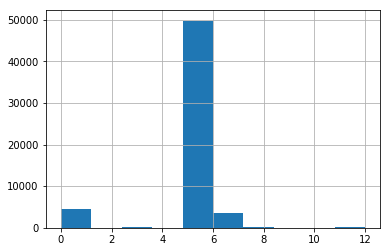

In [21]:
for_predict_df_prod['predict_rf'].hist()

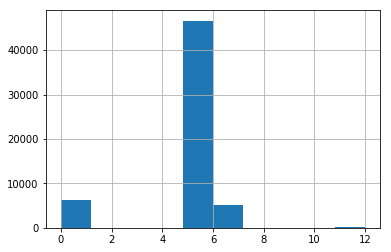